In [57]:
# additional exercise

# dati: franke function??

# linear regression

# neural networks

# tree-based

import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.utils import resample
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [8]:
def bootstrap_bias_variance_decomposition(data_train, data_test, z_train, z_test, model, n_boostraps):

    z_pred = np.empty((len(z_test), n_boostraps))
    for i in range(n_boostraps):
        data_, z_ = resample(data_train, z_train)
        model.fit(data_,z_)
        z_pred[:,i] = np.squeeze(model.predict(data_test)).T

    error = np.mean( np.mean((z_test - z_pred)**2, axis=1, keepdims=True) )
    bias = np.mean( (z_test - np.mean(z_pred, axis=1, keepdims=True))**2 )
    variance = np.mean( np.var(z_pred, axis=1, keepdims=True) )

    return error, bias, variance

In [36]:
rseed = 1
num_points = 1000
var = 1
np.random.seed(rseed)

points = np.random.rand(num_points,2)
z = (FrankeFunction(points[:,0], points[:,1]) + np.random.normal(0,var,[1,num_points])).T

In [37]:
n_boostraps = 500
max_deg = 12
model = LinearRegression(fit_intercept=False)
error = np.zeros(max_deg)
bias = np.zeros(max_deg)
variance = np.zeros(max_deg)

# changing the degree of the polynomia
for deg in range(max_deg):

    poly = PolynomialFeatures(degree=deg+1)
    data = poly.fit_transform(points)

    data_train, data_test, z_train, z_test = train_test_split(data, z, test_size=0.2,random_state=rseed)

    error[deg], bias[deg], variance[deg] = bootstrap_bias_variance_decomposition(data_train, data_test, z_train, z_test, model, n_boostraps)

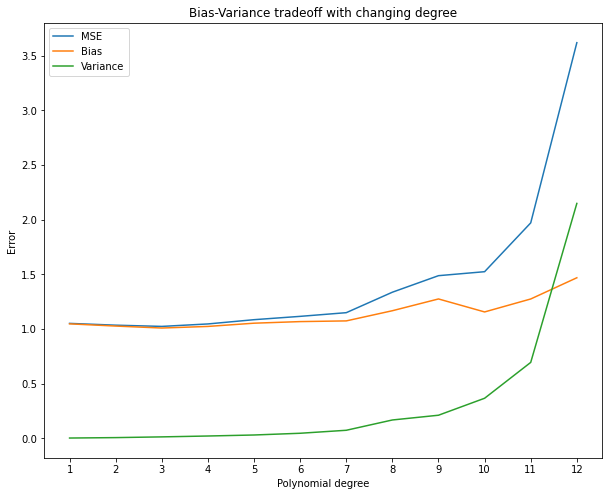

In [38]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,max_deg+1), error, label='MSE')
plt.plot(range(1,max_deg+1), bias, label='Bias')
plt.plot(range(1,max_deg+1), variance, label='Variance')
plt.title("Bias-Variance tradeoff with changing degree")
plt.xlabel("Polynomial degree")
plt.xticks(range(1,max_deg+1))
plt.ylabel("Error")
plt.legend()
#plt.savefig('Bias-Variance tradeoff with changing degree')
plt.show()

In [55]:
n_boostraps = 80
max_deg = 12
model = Ridge(1e-10,fit_intercept=False)
error = np.zeros(max_deg)
bias = np.zeros(max_deg)
variance = np.zeros(max_deg)

# changing the degree of the polynomia
for deg in range(max_deg):

    poly = PolynomialFeatures(degree=deg+1)
    data = poly.fit_transform(points)

    data_train, data_test, z_train, z_test = train_test_split(data, z, test_size=0.2,random_state=rseed)

    error[deg], bias[deg], variance[deg] = bootstrap_bias_variance_decomposition(data_train, data_test, z_train, z_test, model, n_boostraps)

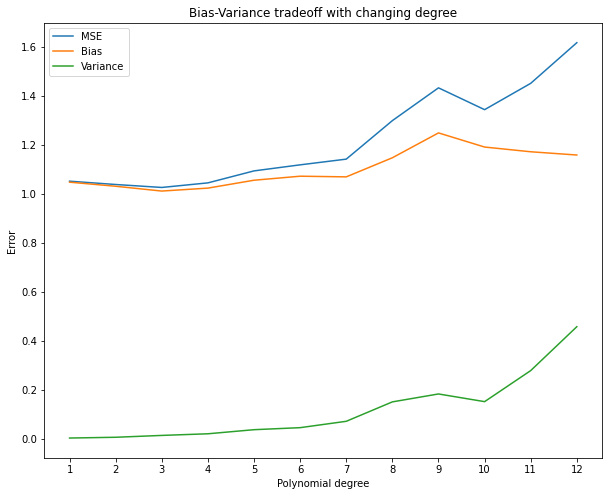

In [56]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,max_deg+1), error, label='MSE')
plt.plot(range(1,max_deg+1), bias, label='Bias')
plt.plot(range(1,max_deg+1), variance, label='Variance')
plt.title("Bias-Variance tradeoff with changing degree")
plt.xlabel("Polynomial degree")
plt.xticks(range(1,max_deg+1))
plt.ylabel("Error")
plt.legend()
#plt.savefig('Bias-Variance tradeoff with changing degree')
plt.show()

In [58]:
n_boostraps = 80
max_deg = 12
model = DecisionTreeRegressor()
error = np.zeros(max_deg)
bias = np.zeros(max_deg)
variance = np.zeros(max_deg)

# changing the degree of the polynomia
for deg in range(max_deg):

    poly = PolynomialFeatures(degree=deg+1)
    data = poly.fit_transform(points)

    data_train, data_test, z_train, z_test = train_test_split(data, z, test_size=0.2,random_state=rseed)

    error[deg], bias[deg], variance[deg] = bootstrap_bias_variance_decomposition(data_train, data_test, z_train, z_test, model, n_boostraps)

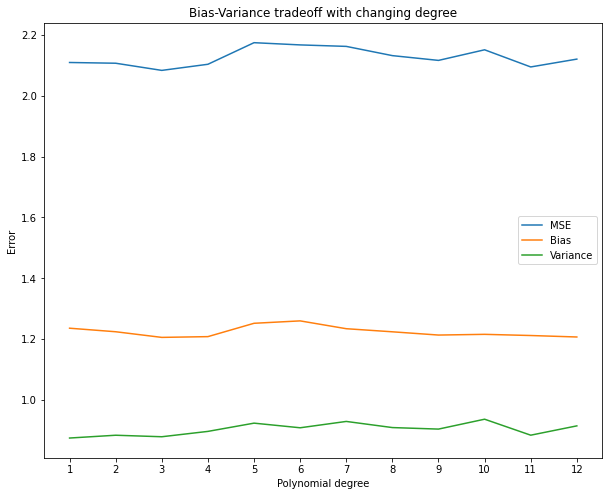

In [59]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,max_deg+1), error, label='MSE')
plt.plot(range(1,max_deg+1), bias, label='Bias')
plt.plot(range(1,max_deg+1), variance, label='Variance')
plt.title("Bias-Variance tradeoff with changing degree")
plt.xlabel("Polynomial degree")
plt.xticks(range(1,max_deg+1))
plt.ylabel("Error")
plt.legend()
#plt.savefig('Bias-Variance tradeoff with changing degree')
plt.show()